In [1]:
pip install mlxtend --upgrade --no-deps

In [2]:
import mlxtend
print(mlxtend.__version__)

0.19.0


In [3]:
import numpy as np
import pandas as pd

# library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# libarary untuk algoritma apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori

In [4]:
# membaca dataset
triwulan1 = pd.read_excel('FP-Growth.xls', 'triwulan1')
triwulan2 = pd.read_excel('FP-Growth.xls', 'triwulan2')
triwulan3 = pd.read_excel('FP-Growth.xls', 'triwulan3')
triwulan4 = pd.read_excel('FP-Growth.xls', 'triwulan4')
frames = [triwulan1, triwulan2, triwulan3, triwulan4]
df = pd.concat(frames)
df

,TANGGAL,NO TRANSAKSI,NAMA BARANG
0,2020-01-01 00:00:00,1JA100,FLORIDINA 320ML
1,NaN,NaN,HELLO SINGKONG BALADO PEDAS
2,NaN,NaN,TWISTKO JGG BKAR 70GR
3,NaN,NaN,NQJ KAOS KAKI JEMPOL
4,NaN,NaN,TOOP RASA GRUBI UNGU
...,...,...,...
47853,NaN,NaN,SUB TOTAL (1JA5235)
47854,NaN,1JA5236,MIE INDOMIE 85GR GORENG SPC
47855,NaN,NaN,TIC TAC 18G PEDAS
47856,NaN,NaN,TIC TAC 18G AYAM BAWANG


In [5]:
# Mengisi data NaN dengan data yang diatasnya
df.fillna(method='ffill', inplace=True)

# menghapus baris sub total pada kolom nama barang
df = df[~df["NAMA BARANG"].str.contains("SUB TOTAL")]

df

,TANGGAL,NO TRANSAKSI,NAMA BARANG
0,2020-01-01 00:00:00,1JA100,FLORIDINA 320ML
1,2020-01-01 00:00:00,1JA100,HELLO SINGKONG BALADO PEDAS
2,2020-01-01 00:00:00,1JA100,TWISTKO JGG BKAR 70GR
3,2020-01-01 00:00:00,1JA100,NQJ KAOS KAKI JEMPOL
4,2020-01-01 00:00:00,1JA100,TOOP RASA GRUBI UNGU
...,...,...,...
47851,31-12-2020,1JA5235,MIE CUP SEDAAP SOTO 77GR
47852,31-12-2020,1JA5235,POP MIE PEDES GLEDEK 75GR
47854,31-12-2020,1JA5236,MIE INDOMIE 85GR GORENG SPC
47855,31-12-2020,1JA5236,TIC TAC 18G PEDAS


In [6]:
products = df['NAMA BARANG'].unique()
print("Total produk: {}".format(len(products)))
# transaction = df['NO TRANSAKSI'].unique()
# print("Total transaksi: {}".format(len(transaction)))

Total produk: 3908


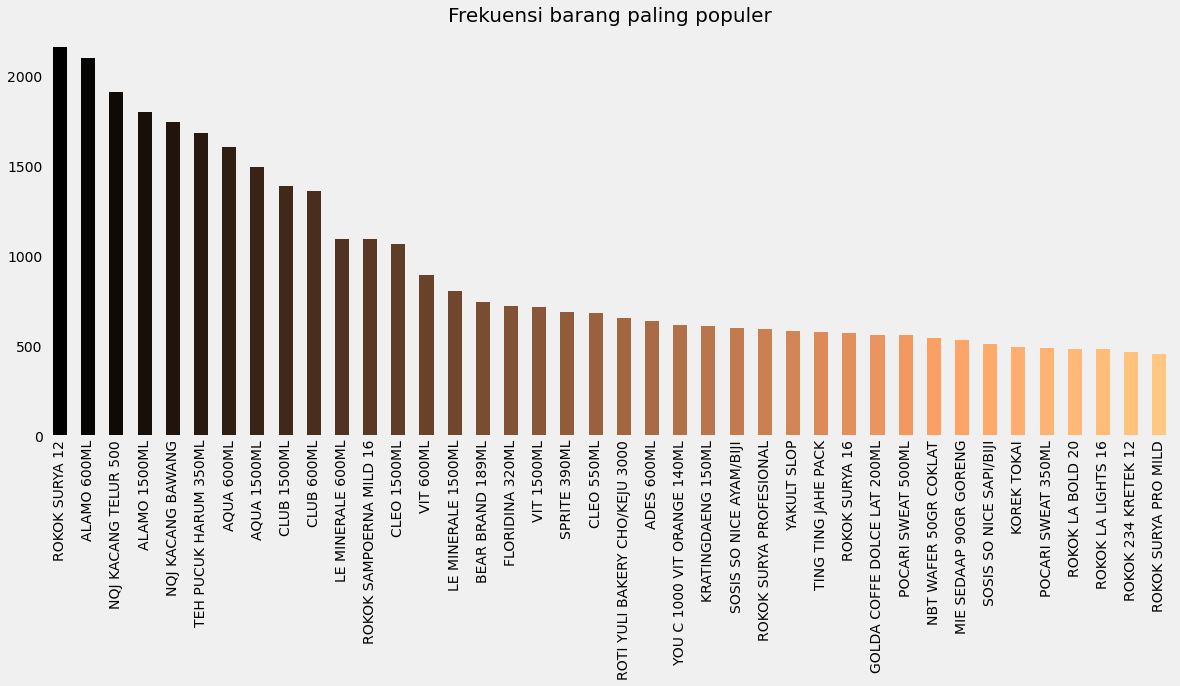

In [7]:
# Jumlah Barang yang paling Populer
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df["NAMA BARANG"].value_counts().head(40).plot.bar(color = color)
plt.title('Frekuensi barang paling populer', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [8]:
one_hot = pd.get_dummies(df['NAMA BARANG'])
df.drop('NAMA BARANG', inplace=True, axis=1)
df = df.join(one_hot)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,TANGGAL,NO TRANSAKSI,AB JARUM CROWN FOX BULAT,AB JARUM HAODIE KOTAK,AB TALI RAMBUT GELANG,ABANG TEH TARIK 24GR,ABC 200ML SARI KACANG HIJAU,ABC 200ML SARI KEDELAI,ABC 200ML SOY BEAN,ABC 250ML APEL,ABC 250ML GUAVA,ABC 250ML JERUK,ABC 250ML JUICE ASAM JAWA,ABC 250ML LECI,ABC 250ML MANGGA,ABC 250ML SIRSAK,ABC EXO 230ML CHOCOMALT C,ABC EXO 230ML MILK COFFE,ABC KOPI SUSU 200ML,ABC PLUS GULA 18GR,ABC SAMBAL ASLI 135ML,ABC SAMBAL AYAM GORENG 135ML,ABC SARI KEDELAI 200ML,ABC SMBL 135ML ASLI,ABC SMBL 135ML AYAM GORENG,ABC SMBL 135ML EXTRA PEDAS,ABC SMBL 135ML MANIS PEDAS,ABC SMBL 135ML SAUS TOMAT,ABRID BELUT SUPER,ABRID BIDARAN KEJU,ABRID CARANG MAS 250GR,ABRID CARANG UNGU ISI12,ABRID KRIPIK BUAH SALAK/NANGKA,ABRID KRIPIK UBI MADU,ABRID KRIPIK UBI UNGU 200GR,ABRID LANTING CRISPY,ABRID MARNING JAGUNG,ABRID SALE GULUNG,ABRID SALE PISANG CRISPY,ABRID SALE PISANG GORENG,...,WPC 400ML BIRU BTL,WPC 400ML HIJAU BTL,WPC 800ML BIRU,X WD 100ML FW ALOE HYDRAMILD,YA HALAA CUP CF ARABICA,YA HALAA CUP CF ROBUSTA HTM,YAKULT SLOP,YAN YAN COKLAT 30GR,YAN YAN STBRI 30GR,YOU C 1000 VIT LEMON 140ML,YOU C 1000 VIT ORANGE 140ML,YOU C 1000 WATER ORG 500ML,YUPI BABY BEARS,YUPI GUMMY FANGS,YUZU GREEN TEA 350ML,YUZU ISOTONIC 350ML,YUZU TEA LEMON 350ML,ZEN 80G+25G SHISO&SULPHUR,ZEN 80GR+25GR SANDALWOOD,ZEN 80GR+25GR SHISO SEA SALT,ZINC 170ML BLACK SHINE,ZINC 170ML HAIR FALL TRTMN,ZINC 170ML REFRESHING COOL,ZINC 80ML ACTIVE FRESH,ZINC 80ML BLACKSHINE,ZINC 80ML CLEAN ACTIVE,ZINC 80ML HAIRFALL,ZINC 80ML MEN ACTIVE COOL,ZINC 80ML MEN HAIRFALL,ZINC 80ML REFRESHING COOL,ZINC 80ML SOFT CARE,ZUPER KEJU 13GR WFR,ZUPERRR KEJU 53.5GR,ZUPERRR KEJU KEJU CKLT 27.5G,ZZ DK 20GR JAGUNG PRESTO PDS,ZZ DTOL LASTING FRESH,ZZ QUQU KUNYIT ASAM 600ML,ZZ TRS 10GR ULTIMA ACNE,ZZ TRS SERUM ULTIMATE LIGHTENI,ZZ TRS SPARKLING BD TRT WHT GL
0,2020-01-01 00:00:00,1JA100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2020-01-01 00:00:00,1JA100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2020-01-01 00:00:00,1JA100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2020-01-01 00:00:00,1JA100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2020-01-04 00:00:00,1JA1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60827,31-03-2020,1JA5621,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60829,31-03-2020,1JA5622,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60831,31-03-2020,1JA5623,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60833,31-03-2020,1JA5624,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# transaksi = (df.groupby(['NO TRANSAKSI', 'NAMA BARANG'])['NAMA BARANG']
#           .sum().unstack().reset_index()
#           .set_index('NO TRANSAKSI'))

In [10]:
transaksi = df.groupby(["NO TRANSAKSI","TANGGAL"])[products[:]].apply(sum)
transaksi = transaksi.reset_index()[products]

In [11]:
transaksi

,FLORIDINA 320ML,HELLO SINGKONG BALADO PEDAS,TWISTKO JGG BKAR 70GR,NQJ KAOS KAKI JEMPOL,TOOP RASA GRUBI UNGU,SILVERQUEEN 30GR GREEN TEA,NBT HANSEL 34GR,MIE CUP SEDAAP SOTO 77GR,NUVO FML 76GR ENERGIZING,CUSSON KIDS SMPO 100ML STBRI,H&S 75ML LEMON FRESH,NUVO FML 76GR CARE PROTECT,ROKOK SAMPOERNA MILD 16,CANDI MAS KURNIA RAMBAK SAPI,ROKOK DJARUM SUPER 12,POTA BEE 68GR BBQ,HATARI MALKIST C COCONUT 120G,TORA CAFE ICED MILKY L 180ML,AQUA 1500ML,ROKOK LA ICE 16,BISKUAT COKLAT 67.2GR,FRISIAN F 225ML PUREF COKLAT,FRESTEA 500ML APPLE,ROMA SARI GANDUM CKLT 115GR,LAYS 68GR RUMPUT LAUT,FRISIAN F 180ML BTL STROBERI,MALANG SINGKONG MADURA,SMAX RING KEJU 50GR,TARO 10GR SEAWEED,ROKOK LA BOLD 20,AMANDA KRIPIK PISANG,CRUNCH CHIPS 30GR CHOCOLATE,KOPIKO BLISTER CLASSIC 24GR,JAPOTA UMAMI JPNSE SEAWED 68GR,AL MANDURY 300GR,AQUA 600ML,DK SUKRO 70GR,TOOP RASA KRIPIK PISANG,DK SUKRO 140GR,FRESTEA 350ML HONEY,...,FOXS BERRIES OVL125GR,PASEO FACIAL 200S 2PLY,LUX BW SOFT ROSE 90ML,SOFTERGENT LIQUID ANTI B 23M,VIVA CP LILAC 19GR NATURAL,KOKOCHI RUMPUT LAUT 40GR,LIFEBUOY BW TOTAL 10 90ML,SANITER SPRAY 200ML FRESH CLN,STELLA 8ML CAR PARF SHINE,AIM GABIN SUPERBIS 350G,CD NIKITEX SUPER ISI 3/PACK,TOPI 002,CIMORY 70ML BTL ORIGINAL,CIMORY 70ML BTL STROBERI,CIMORY 250ML BTL LYCHEE,ZINC 170ML REFRESHING COOL,NYP SIKAT CUCI MARIO,FRISIAN F 200GR FC GOLD,PIXY EYELINER BLACK 5ML,NYP SIKAT CUCI NAGOYA,GLICO POCKY COOKIES 40G,CLEAR 9ML ACTIVE CLEAN 3IN1,SUNLIGHT 52ML REF,KERTAS MINYAK BSR/7 LMBR,ABC SMBL 135ML AYAM GORENG,TISSUE TODAY 2PLY 50S,NC MASKER HEAD HIJAB ISI 5,CIMORY 70ML BTL BLUEBERRY,CIMORY 70ML BTL MIXED BERRY,DK KORO 18G RUMPUT LAUT,CIMORY 250ML BTL BLUEBERRY,CIMORY 250ML BTL MIXED FRUIT,"PERMEN OB HERBAL 2,5G",GILLETTE GOAL II 2S,NBT GRAKER KEJU RASPBERRY 20GR,NBT GRAKER CHOCHOLATE 20GR,ATTACK SOFTENER 50GR,PERMEN TING2 GARUDA 125GR,CANIBO CALIFORNIA,SIIPLAH KIDAY APEL&LECI 350ML
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
set_transaksi = transaksi.applymap(encode_units)
 
set_transaksi

,FLORIDINA 320ML,HELLO SINGKONG BALADO PEDAS,TWISTKO JGG BKAR 70GR,NQJ KAOS KAKI JEMPOL,TOOP RASA GRUBI UNGU,SILVERQUEEN 30GR GREEN TEA,NBT HANSEL 34GR,MIE CUP SEDAAP SOTO 77GR,NUVO FML 76GR ENERGIZING,CUSSON KIDS SMPO 100ML STBRI,H&S 75ML LEMON FRESH,NUVO FML 76GR CARE PROTECT,ROKOK SAMPOERNA MILD 16,CANDI MAS KURNIA RAMBAK SAPI,ROKOK DJARUM SUPER 12,POTA BEE 68GR BBQ,HATARI MALKIST C COCONUT 120G,TORA CAFE ICED MILKY L 180ML,AQUA 1500ML,ROKOK LA ICE 16,BISKUAT COKLAT 67.2GR,FRISIAN F 225ML PUREF COKLAT,FRESTEA 500ML APPLE,ROMA SARI GANDUM CKLT 115GR,LAYS 68GR RUMPUT LAUT,FRISIAN F 180ML BTL STROBERI,MALANG SINGKONG MADURA,SMAX RING KEJU 50GR,TARO 10GR SEAWEED,ROKOK LA BOLD 20,AMANDA KRIPIK PISANG,CRUNCH CHIPS 30GR CHOCOLATE,KOPIKO BLISTER CLASSIC 24GR,JAPOTA UMAMI JPNSE SEAWED 68GR,AL MANDURY 300GR,AQUA 600ML,DK SUKRO 70GR,TOOP RASA KRIPIK PISANG,DK SUKRO 140GR,FRESTEA 350ML HONEY,...,FOXS BERRIES OVL125GR,PASEO FACIAL 200S 2PLY,LUX BW SOFT ROSE 90ML,SOFTERGENT LIQUID ANTI B 23M,VIVA CP LILAC 19GR NATURAL,KOKOCHI RUMPUT LAUT 40GR,LIFEBUOY BW TOTAL 10 90ML,SANITER SPRAY 200ML FRESH CLN,STELLA 8ML CAR PARF SHINE,AIM GABIN SUPERBIS 350G,CD NIKITEX SUPER ISI 3/PACK,TOPI 002,CIMORY 70ML BTL ORIGINAL,CIMORY 70ML BTL STROBERI,CIMORY 250ML BTL LYCHEE,ZINC 170ML REFRESHING COOL,NYP SIKAT CUCI MARIO,FRISIAN F 200GR FC GOLD,PIXY EYELINER BLACK 5ML,NYP SIKAT CUCI NAGOYA,GLICO POCKY COOKIES 40G,CLEAR 9ML ACTIVE CLEAN 3IN1,SUNLIGHT 52ML REF,KERTAS MINYAK BSR/7 LMBR,ABC SMBL 135ML AYAM GORENG,TISSUE TODAY 2PLY 50S,NC MASKER HEAD HIJAB ISI 5,CIMORY 70ML BTL BLUEBERRY,CIMORY 70ML BTL MIXED BERRY,DK KORO 18G RUMPUT LAUT,CIMORY 250ML BTL BLUEBERRY,CIMORY 250ML BTL MIXED FRUIT,"PERMEN OB HERBAL 2,5G",GILLETTE GOAL II 2S,NBT GRAKER KEJU RASPBERRY 20GR,NBT GRAKER CHOCHOLATE 20GR,ATTACK SOFTENER 50GR,PERMEN TING2 GARUDA 125GR,CANIBO CALIFORNIA,SIIPLAH KIDAY APEL&LECI 350ML
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# Build up the frequent items 
frequent_itemsets = fpgrowth(set_transaksi, min_support=0.08, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.093676,(ALAMO 600ML)
1,0.093988,(ROKOK SURYA 12)
2,0.082451,(NQJ KACANG TELUR 500)
3,0.080759,(ALAMO 1500ML)


In [16]:
# Create the rules
rules = association_rules (frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### List diatas merupakan kombinasi barang yang sering dibeli oleh customer berdasarkan aturan asosiasi algoritma apriori